In [3]:
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
from halotools.empirical_models import Zheng07

Populating the interactive namespace from numpy and matplotlib
igraph package not installed.  Some functions will not be available.


In [4]:
model = Zheng07(threshold=-21)

In [30]:
theta = np.loadtxt("/home/mj/public_html/nbar_clustering_vmean_theta_t34.dat")
w = np.loadtxt("/home/mj/public_html/nbar_clustering_vmean_w_t34.dat")

In [8]:
print np.median(theta , axis = 0)

[ 10.78817519   0.29638574  12.77151724   1.16595597  13.95079769]


In [10]:
print np.mean(theta , axis = 0)

[ 10.77899531   0.29311028  12.77544257   1.16416202  13.94917865]


In [12]:
#samples[:, 2] = np.exp(samples[:, 2])
m_mcmc= map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(theta, [16, 50, 84],
                                                axis=0)))

In [44]:
prior_dict = {

    'logM0'  : {'shape': 'uniform', 'min': 9.  ,  'max': 15.},
    'sigma_logM': {'shape': 'uniform', 'min': 0. ,  'max': 1.},
    'logMmin': {'shape': 'uniform', 'min': 12.5,  'max': 13.09},
    'alpha': {'shape': 'uniform', 'min': .9 ,  'max': 1.45},
    'logM1'  : {'shape': 'uniform', 'min': 13.6  ,  'max': 14.25},
}

"""Plot range"""

plot_range = []
for key in ['logM0', 'sigma_logM', 'logMmin','alpha','logM1']:
        plot_range.append([prior_dict[key]['min'], prior_dict[key]['max']])
prior_range = np.array(plot_range)




In [14]:
np.percentile(theta, [16, 50, 84],axis=0)

array([[  9.7036409 ,   0.18417927,  12.74248999,   1.12354844,
         13.93447266],
       [ 10.78817519,   0.29638574,  12.77151724,   1.16595597,
         13.95079769],
       [ 11.83967941,   0.39815633,  12.80909791,   1.20702004,
         13.96512225]])

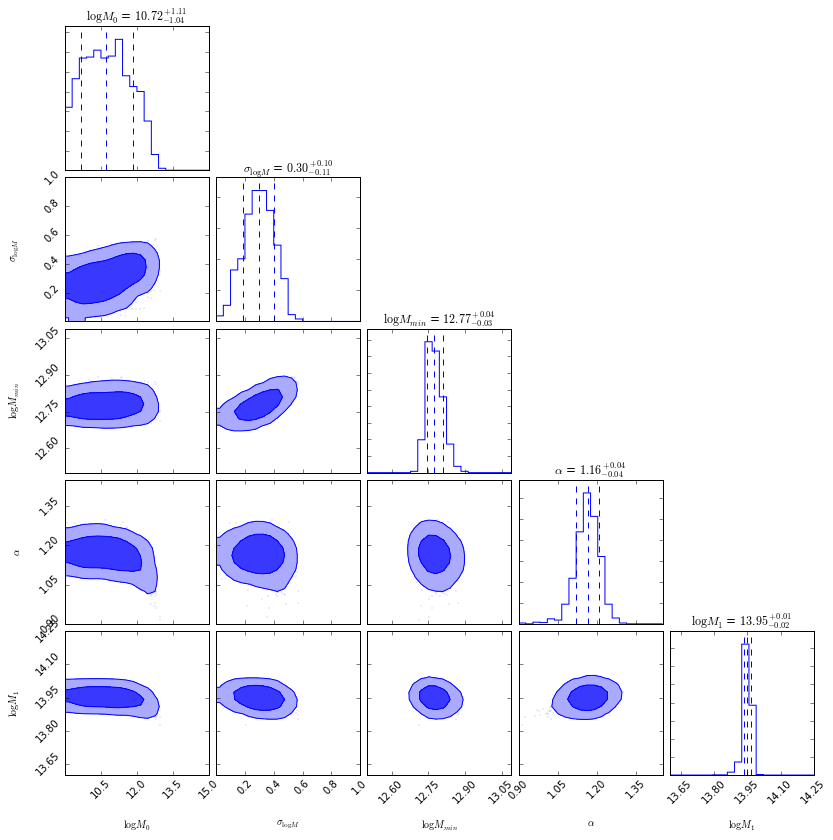

In [79]:
import corner
corner.corner(theta, labels=[r'$\logM_{0}$',r'$\sigma_{\logM}$',r'$\logM_{min}$',r'$\alpha$',r'$\logM_{1}$'],
                range=plot_range , quantiles=[0.16,0.5,0.84],
                show_titles=True, title_args={"fontsize": 12},
                plot_datapoints=True, fill_contours=True, levels=[0.68, 0.95], 
                color='b', bins=20, smooth=1.0)
plt.savefig("/home/mj/public_html/infered_hod.png")

{'logM0': 11.92, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.94}


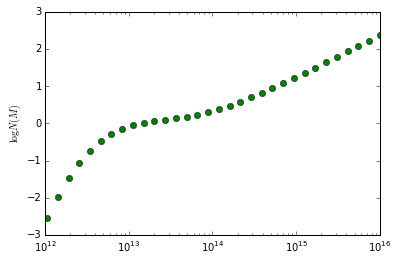

In [85]:
m = np.logspace(11,16, 40)
#print m
from scipy.special import erf

def mean_central(M , model):
    logMmin = model.param_dict["logMmin"]
    sigma = model.param_dict["sigma_logM"]
    return .5 * (1. + erf((np.log10(M) - logMmin)/(sigma)))
def mean_satelite(M , model):
    ncen  = mean_central(M , model)
    M0 = 10. ** model.param_dict["logM0"]
    M1 = 10. ** model.param_dict["logM1"]
    alpha = model.param_dict["alpha"]
    return ncen * ((M - M0)/(M1)) ** alpha
input_hod = np.log10(mean_central(m, model) + mean_satelite(m , model))
#pylab.loglog(m , mean_central(m) , "ro" , alpha = .1 , lw = 4.)
#pylab.loglog(m , mean_satelite(m) , "bo" , alpha = .1 , lw = 4.)
pylab.semilogx(m , np.log10(mean_central(m, model) + mean_satelite(m , model)) , "go" , alpha = 1.)
pylab.ylabel(r"$\log N(M)$")
#pylab.ylim((10**-6))
print model.param_dict

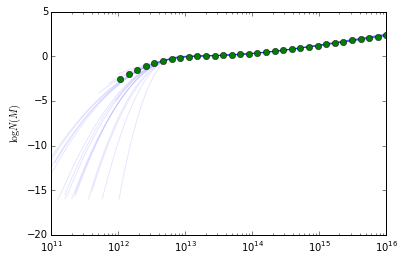

In [86]:
X = np.logspace(11,16, 100)
for i in (np.random.rand(20)*len(theta)).astype(int):
    #print theta[i]
    mod = Zheng07(threshold = -21)
    #print mod.param_dict['logM0']
    mod.param_dict["logM0"] = theta[i][0]
    mod.param_dict["sigma_logM"] = theta[i][1]
    mod.param_dict["logMmin"] = theta[i][2]
    mod.param_dict["alpha"] = theta[i][3]
    mod.param_dict["logM1"] = theta[i][4]
    #mod.param_dict = theta[i]
    #mod.param_dict["logM0"] , mod.param_dict["sigma_logM"] , mod.param_dict["logMmin"],mod.param_dict["alpha"] , mod.param_dict["logM1"]= theta[i][0],theta[i][1],theta[i][2],theta[i][3],theta[i][4] 
    output_hod = np.log10(mean_central(X, mod) + mean_satelite(X , mod))
    pylab.semilogx(X , output_hod , "b-" , alpha = .1)
    
    pylab.ylabel(r"$\log N(M)$")
pylab.semilogx(m , input_hod , "go" , alpha = 1.)